# INFO 4604 Final Project
# by Anastasiya Zhukova, Hande Batan, Kexin Zhai

## Non_data Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

df_non = pd.read_csv('non_data.csv', header = 0)
df_non.apply(pd.to_numeric)

/Users/kexinzhai/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Male,Female,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService(DSL),InternetService(Fiber optic),...,Contract(one year),Contract(two year),PaperlessBilling,PaymentMethod(ElectronicCheck),PaymentMethod(MailedCheck),PaymentMethod(BankTransfer),PaymentMethod(CreditCard),MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,0,0,0,0,1,0,...,0,0,1,1,0,0,0,29.85,29.85,0
1,0,1,0,0,0,2,1,0,1,0,...,1,0,0,0,1,0,0,56.95,1889.50,0
2,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,53.85,108.15,1
3,0,1,0,0,0,2,0,0,1,0,...,1,0,0,0,0,1,0,42.30,1840.75,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,1,1,0,0,0,70.70,151.65,1
5,1,0,0,0,0,0,1,1,0,1,...,0,0,1,1,0,0,0,99.65,820.50,1
6,0,1,0,0,1,1,1,1,0,1,...,0,0,1,0,0,0,1,89.10,1949.40,0
7,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,29.75,301.90,0
8,1,0,0,1,0,1,1,1,0,1,...,0,0,1,1,0,0,0,104.80,3046.05,1
9,0,1,0,0,1,3,1,0,1,0,...,1,0,0,0,0,1,0,56.15,3487.95,0


In [2]:
X_non = df_non.drop(columns=['Churn'])
Y_non = df_non['Churn']
feature_name = list(df_non)
standard = ['tenure', 'MonthlyCharges', 'TotalCharges']
for c in standard:
    X_non[c] = (X_non[c]-X_non[c].mean())/X_non[c].std()

X_train, X_test, Y_train, Y_test = train_test_split(X_non, Y_non, test_size=0.3)

### 1. MLP Classifier

In [3]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

classifier = DummyClassifier(strategy='most_frequent')
classifier.fit(X_non, Y_non)

print("Training accuracy: %0.6f" % accuracy_score(Y_train, classifier.predict(X_train)))
print("Testing accuracy: %0.6f" % accuracy_score(Y_test, classifier.predict(X_test)))

Training accuracy: 0.734051
Testing accuracy: 0.734597


In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

params = {'hidden_layer_sizes':[25,50,75,100,200], 'activation':['logistic', 'tanh', 'relu'], 'alpha':[0.0, 0.0001, 0.001]}

classifier_MLP = MLPClassifier(random_state=123)
grid_search = GridSearchCV(classifier_MLP, param_grid = params, scoring='accuracy',n_jobs=4, verbose=1)
#fit grid_search to the training data instead of the classifier
grid_search.fit(X_train, Y_train)
    
print("Training accuracy: %0.6f" % accuracy_score(Y_train, grid_search.predict(X_train)))
print("Test accuracy: %0.6f" % accuracy_score(Y_test, grid_search.predict(X_test)))
print(grid_search.best_params_)
print('')

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   28.4s
/Users/kexinzhai/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kexinzhai/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed:  1.7min finished


Training accuracy: 0.808818
Test accuracy: 0.804739
{'activation': 'tanh', 'alpha': 0.0, 'hidden_layer_sizes': 50}



In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

params = {'hidden_layer_sizes':[(100,25), (100,50), (100,75), (100,100), (100,200)], 'activation':['logistic', 'tanh', 'relu'], 'alpha':[0.0, 0.0001, 0.001]}

classifier_MLP = MLPClassifier(random_state=123)
grid_search_2layers = GridSearchCV(classifier_MLP, param_grid = params, scoring='accuracy',n_jobs=4, verbose=1)
#fit grid_search to the training data instead of the classifier
grid_search_2layers.fit(X_train, Y_train)
    
print("Training accuracy: %0.6f" % accuracy_score(Y_train, grid_search_2layers.predict(X_train)))
print("Test accuracy: %0.6f" % accuracy_score(Y_test, grid_search_2layers.predict(X_test)))
print(grid_search_2layers.best_params_)
print('')

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   31.4s
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed:  2.6min finished


Training accuracy: 0.811459
Test accuracy: 0.803791
{'activation': 'tanh', 'alpha': 0.0, 'hidden_layer_sizes': (100, 25)}



In [6]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = grid_search.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test,predictions))

[[1416  134]
 [ 278  282]]
             precision    recall  f1-score   support

          0       0.84      0.91      0.87      1550
          1       0.68      0.50      0.58       560

avg / total       0.79      0.80      0.79      2110



In [7]:
X_miss = X_test[Y_test != predictions]
X_hit = X_test[Y_test == predictions]
X_miss_0 = X_test[(Y_test != predictions) & (Y_test == 0)]
X_miss_1 = X_test[(Y_test != predictions) & (Y_test == 1)]
X_hit_1 = X_test[(Y_test == predictions) & (Y_test ==1)]
# variables to compare mean difference 
# experiment with more variables in grid search 
# export this output as a df, might put into report 

for c in X_test.columns:
    print('Column:{}, Overall mean:{:3f}, True positive mean:{:3f}, False negative mean:{:3f}'.format(c, X_test[c].mean(),
                                                                                                      X_hit_1[c].mean(), 
                                                                                                      X_miss_1[c].mean()))
    print('')

Column:Male, Overall mean:0.493365, True positive mean:0.503546, False negative mean:0.521583

Column:Female, Overall mean:0.506635, True positive mean:0.496454, False negative mean:0.478417

Column:SeniorCitizen, Overall mean:0.158768, True positive mean:0.304965, False negative mean:0.215827

Column:Partner, Overall mean:0.485782, True positive mean:0.255319, False negative mean:0.464029

Column:Dependents, Overall mean:0.292891, True positive mean:0.088652, False negative mean:0.255396

Column:tenure, Overall mean:-0.008817, True positive mean:-1.014436, False negative mean:-0.143014

Column:PhoneService, Overall mean:0.900000, True positive mean:0.911348, False negative mean:0.924460

Column:MultipleLines, Overall mean:0.404739, True positive mean:0.489362, False negative mean:0.384892

Column:InternetService(DSL), Overall mean:0.338389, True positive mean:0.109929, False negative mean:0.327338

Column:InternetService(Fiber optic), Overall mean:0.443128, True positive mean:0.890071

### 2. SVM Classifier

#### Baseline Accuracy

In [8]:
#baseline accuracy -- expect the classifier to outperform 
    # helpful - contextualizing how good the classifier is doing
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

classifier = DummyClassifier(strategy='most_frequent')
classifier.fit(X_train, Y_train)

print("Training accuracy: %0.6f" % accuracy_score(Y_train, classifier.predict(X_train)))
print("Testing accuracy: %0.6f" % accuracy_score(Y_test, classifier.predict(X_test)))

Training accuracy: 0.734051
Testing accuracy: 0.734597


In [9]:
# running SVM without parameters
from sklearn.svm import SVC

train = []
test = []
classifier = SVC()
classifier.fit(X_train, Y_train)

train.append(accuracy_score(Y_train, classifier.predict(X_train)))
test.append(accuracy_score(Y_test, classifier.predict(X_test)))
        
print("Training accuracy: %0.6f" % accuracy_score(Y_train, classifier.predict(X_train)))
print("Test accuracy: %0.6f" % accuracy_score(Y_test, classifier.predict(X_test)))

Training accuracy: 0.803941
Test accuracy: 0.802370


choosing parameters 
"C" can be alter the sensitivity of the algorithm 
- start with the defould value 1 
- adjust accordingly 

-- how sensitive do you want your algorithm to be 

trade between classified examples and perfect classification 
- should it care about getting everything right vs getting the things that it gets very right
high C - everything correct 
mid C - how broud the margin is - 
low C- cares about max margin -- distic cluster points 

### Testing Linear, RBF , & Poly with C = 1

In [10]:
train = []
test = []

kernal_values = ['linear' , 'rbf' , "poly"]

for kernel in kernal_values:
    classifier = SVC(kernel= kernel, degree = 3 ,  C= 1  , random_state=123)
    classifier.fit(X_train, Y_train)
        
    train.append(accuracy_score(Y_train, classifier.predict(X_train)))
    test.append(accuracy_score(Y_test, classifier.predict(X_test)))
       
    train_accuracy = accuracy_score(Y_train, classifier.predict(X_train))
    test_accuracy = accuracy_score(Y_test, classifier.predict(X_test)) 
    
    print("|" , kernel , "|"  ,  train_accuracy  , "|" , test_accuracy )

| linear | 0.8043478260869565 | 0.8028436018957346
| rbf | 0.8039414872003251 | 0.8023696682464455
| poly | 0.7950020316944332 | 0.8014218009478673


In [11]:
train = []
test = []

kernal_values = ['linear' , 'rbf' , "poly"]
c_values =  [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

for kernel in kernal_values:
    for number in c_values:
        classifier = SVC(kernel= kernel, degree = 3, C = number, random_state=123)
        classifier.fit(X_train, Y_train)
        
        train.append(accuracy_score(Y_train, classifier.predict(X_train)))
        test.append(accuracy_score(Y_test, classifier.predict(X_test)))
      
        train_accuracy = accuracy_score(Y_train, classifier.predict(X_train))
        test_accuracy = accuracy_score(Y_test, classifier.predict(X_test)) 
    
        print("|" ,  kernel , "|" , number ,"|" ,  train_accuracy , "|" , test_accuracy)

| linear | 0.0001 | 0.7340511986997156 | 0.7345971563981043
| linear | 0.001 | 0.7340511986997156 | 0.7345971563981043
| linear | 0.01 | 0.8039414872003251 | 0.8028436018957346
| linear | 0.1 | 0.804754164973588 | 0.8014218009478673
| linear | 1.0 | 0.8043478260869565 | 0.8028436018957346
| linear | 10.0 | 0.8039414872003251 | 0.8028436018957346
| linear | 100.0 | 0.8037383177570093 | 0.8037914691943128
| linear | 1000.0 | 0.8037383177570093 | 0.8028436018957346
| rbf | 0.0001 | 0.7340511986997156 | 0.7345971563981043
| rbf | 0.001 | 0.7340511986997156 | 0.7345971563981043
| rbf | 0.01 | 0.7340511986997156 | 0.7345971563981043
| rbf | 0.1 | 0.7956115400243803 | 0.8014218009478673
| rbf | 1.0 | 0.8039414872003251 | 0.8023696682464455
| rbf | 10.0 | 0.8161316537992686 | 0.8033175355450237
| rbf | 100.0 | 0.8470134091832588 | 0.7938388625592417
| rbf | 1000.0 | 0.9122308004876066 | 0.7497630331753554
| poly | 0.0001 | 0.7340511986997156 | 0.7345971563981043
| poly | 0.001 | 0.734051198699

###  Testing Kernels with Gamma with top C value 

df_non - 
- | linear | 0.01 | 0.8043478260869565 | 0.795260663507109 | 
- | rbf | 1.0 | 0.8073953677366924 | 0.79478672985782 |
- | poly | 10.0 | 0.821007720438846 | 0.7886255924170616 |

In [12]:
#learned that the RBF kernel has a hyperparameter $\gamma$ which can affect overfitting. You can set the value of $\gamma$ with the keyword argument `gamma`

train = []
test = []

gamma_values = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
for gamma_v in gamma_values:
    classifier = SVC(kernel= "linear" , gamma = gamma_v  ,  C= .01  , random_state=123)
    classifier.fit(X_train, Y_train)

    train.append(accuracy_score(Y_train, classifier.predict(X_train)))
    test.append(accuracy_score(Y_test, classifier.predict(X_test)))

    train_accuracy = accuracy_score(Y_train, classifier.predict(X_train))
    test_accuracy = accuracy_score(Y_test, classifier.predict(X_test)) 

    print( "|" ,  gamma_v , "|" ,   train_accuracy , "|" , test_accuracy , "|" )

| 0.01 | 0.8039414872003251 | 0.8028436018957346 |
| 0.001 | 0.8039414872003251 | 0.8028436018957346 |
| 0.0001 | 0.8039414872003251 | 0.8028436018957346 |
| 1e-05 | 0.8039414872003251 | 0.8028436018957346 |
| 1e-06 | 0.8039414872003251 | 0.8028436018957346 |
| 1e-07 | 0.8039414872003251 | 0.8028436018957346 |


In [13]:
# rbf 
#learned that the RBF kernel has a hyperparameter $\gamma$ which can affect overfitting. You can set the value of $\gamma$ with the keyword argument `gamma`

train = []
test = []

gamma_values = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
for gamma_v in gamma_values:
    classifier = SVC(kernel= "rbf" , gamma = gamma_v  ,  C= 1  , random_state=123)
    classifier.fit(X_train, Y_train)

    train.append(accuracy_score(Y_train, classifier.predict(X_train)))
    test.append(accuracy_score(Y_test, classifier.predict(X_test)))

    train_accuracy = accuracy_score(Y_train, classifier.predict(X_train))
    test_accuracy = accuracy_score(Y_test, classifier.predict(X_test)) 

    print( "|" ,  gamma_v , "|" ,   train_accuracy , "|" , test_accuracy , "|" )

| 0.01 | 0.8006907761072735 | 0.8056872037914692 |
| 0.001 | 0.792157659488013 | 0.7943127962085308 |
| 0.0001 | 0.7340511986997156 | 0.7345971563981043 |
| 1e-05 | 0.7340511986997156 | 0.7345971563981043 |
| 1e-06 | 0.7340511986997156 | 0.7345971563981043 |
| 1e-07 | 0.7340511986997156 | 0.7345971563981043 |


In [14]:
# poly 
#learned that the RBF kernel has a hyperparameter $\gamma$ which can affect overfitting. You can set the value of $\gamma$ with the keyword argument `gamma`

train = []
test = []

gamma_values = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
for gamma_v in gamma_values:
    classifier = SVC(kernel= "poly" , gamma = gamma_v  ,  degree = 3  ,  C= 10  , random_state=123)
    classifier.fit(X_train, Y_train)

    train.append(accuracy_score(Y_train, classifier.predict(X_train)))
    test.append(accuracy_score(Y_test, classifier.predict(X_test)))

    train_accuracy = accuracy_score(Y_train, classifier.predict(X_train))
    test_accuracy = accuracy_score(Y_test, classifier.predict(X_test)) 

    print( "|" ,  gamma_v , "|" ,   train_accuracy , "|" , test_accuracy , "|" )

| 0.01 | 0.7720438845997561 | 0.7748815165876777 |
| 0.001 | 0.7340511986997156 | 0.7345971563981043 |
| 0.0001 | 0.7340511986997156 | 0.7345971563981043 |
| 1e-05 | 0.7340511986997156 | 0.7345971563981043 |
| 1e-06 | 0.7340511986997156 | 0.7345971563981043 |
| 1e-07 | 0.7340511986997156 | 0.7345971563981043 |


### top performing gamma with top C values 

df
- Linear
- RBF
- Poly

### Feature Selection 

- Principle Component Analysis - PCA 

In [15]:
import numpy as np
from sklearn.decomposition import PCA

In [16]:
fs_df = PCA(n_components=2)
fs_df.fit(X_non)
fs_df.explained_variance_ratio_

array([0.35398411, 0.16172684])

In [17]:
fs_df.components_

array([[ 0.00244657, -0.00244657,  0.03138727,  0.09696116,  0.01374543,
         0.45160584,  0.02147351,  0.15418755, -0.01499639,  0.13936413,
        -0.12436774,  0.11470225,  0.15352842,  0.16364537,  0.1250079 ,
         0.17583508,  0.17682169, -0.11804489,  0.03873914,  0.07930575,
         0.06859536,  0.00625214, -0.09628255,  0.0459695 ,  0.04406091,
         0.46904934,  0.57008384],
       [ 0.00901174, -0.00901174,  0.08048026, -0.13006991, -0.13297012,
        -0.50882217,  0.04093573,  0.06503008, -0.09122779,  0.29685028,
        -0.20562249, -0.04892446,  0.0130008 ,  0.018865  , -0.03849308,
         0.11398582,  0.11177864,  0.3005111 , -0.08366252, -0.21684857,
         0.16353303,  0.22203558, -0.07128094, -0.07315091, -0.07760374,
         0.52147945, -0.12875665]])

In [18]:
fs_df.mean_

array([ 4.95307167e-01,  5.04692833e-01,  1.62400455e-01,  4.82508532e-01,
        2.98492605e-01,  8.79084443e-17,  9.03299204e-01,  4.21928328e-01,
        3.43572241e-01,  4.40273038e-01,  2.16154721e-01,  2.86547213e-01,
        3.44852105e-01,  3.43856655e-01,  2.90102389e-01,  3.84385666e-01,
        3.88367463e-01,  5.51052332e-01,  2.09328783e-01,  2.39618885e-01,
        5.92718999e-01,  3.36319681e-01,  2.28100114e-01,  2.19283276e-01,
        2.16296928e-01, -1.36712787e-15, -1.71800382e-15])

In [19]:
fs_df.singular_values_

array([140.9385725 ,  95.26404814])

### Confusion Matrix / Heat Map

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

test = []
train = []

label_names = [ 0 , 1] 
classifier = SVC(kernel = "linear", gamma = .01 , C= .01  , random_state=123 )
classifier.fit(X_test, Y_test)
        
confusion_matrix_values = confusion_matrix(Y_test, classifier.predict(X_test))
print(confusion_matrix_values)


from sklearn.metrics import classification_report,confusion_matrix

predictions = classifier.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test,predictions))

[[1413  137]
 [ 289  271]]
[[1413  137]
 [ 289  271]]
             precision    recall  f1-score   support

          0       0.83      0.91      0.87      1550
          1       0.66      0.48      0.56       560

avg / total       0.79      0.80      0.79      2110



<Figure size 720x720 with 0 Axes>

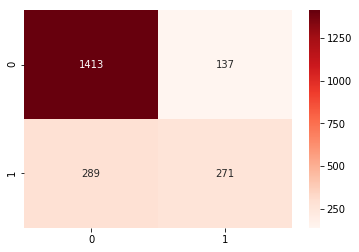

<Figure size 720x720 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt

confusion_df = pd.DataFrame(confusion_matrix_values, index=label_names, columns=label_names)

sb.heatmap(confusion_df, annot=True, fmt="d", cmap='Reds')
plt.figure(figsize=(10, 10))

### looking at weights using perceptron 

In [22]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.feature_extraction.text import CountVectorizer

train = []
test = []

classifier = SGDClassifier(loss='perceptron', max_iter=1000, tol=1.0e-12, random_state=123)
classifier.fit(X_train, Y_train)

#classifier = Perceptron(alpha=0.0001 , tol=1e-3, random_state=0)

train.append(accuracy_score(Y_train, classifier.predict(X_train)))
test.append(accuracy_score(Y_test, classifier.predict(X_test)))

train_accuracy = accuracy_score(Y_train, classifier.predict(X_train))
test_accuracy = accuracy_score(Y_test, classifier.predict(X_test)) 

print("Number of SGD iterations: %d" % classifier.n_iter_)
print("Training accuracy: %0.6f" % accuracy_score(Y_train, classifier.predict(X_train)))
print("Test accuracy: %0.6f" % accuracy_score(Y_test, classifier.predict(X_test)))

print("\nFeature weights:")
args = np.argsort(classifier.coef_[0])
for a in args:
    print(" %s: %0.4f" % ('weights' , classifier.coef_[0][a]))

Number of SGD iterations: 48
Training accuracy: 0.658675
Test accuracy: 0.659242

Feature weights:
 weights: -0.2310
 weights: -0.1264
 weights: -0.0000
 weights: -0.0000
 weights: -0.0000
 weights: 0.0249
 weights: 0.0421
 weights: 0.0843
 weights: 0.1139
 weights: 0.1264
 weights: 0.1264
 weights: 0.1264
 weights: 0.1686
 weights: 0.2107
 weights: 0.2107
 weights: 0.2107
 weights: 0.2950
 weights: 0.3372
 weights: 0.3793
 weights: 0.3793
 weights: 0.4215
 weights: 0.4636
 weights: 0.5901
 weights: 0.6322
 weights: 0.7587
 weights: 0.7587
 weights: 0.9273


## 3. Decision Trees Classifier

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

#Without using parameter
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

print("Training accuracy: %0.6f" % accuracy_score(Y_train, classifier.predict(X_train)))
print("Test accuracy: %0.6f" % accuracy_score(Y_test, classifier.predict(X_test)))

Training accuracy: 0.998984
Test accuracy: 0.722749


In [24]:
#Using random_state which would normally keep randomness consistent 
classifier_r = DecisionTreeClassifier(random_state=123)
classifier_r.fit(X_train, Y_train)

print("Training accuracy: %0.6f" % accuracy_score(Y_train, classifier_r.predict(X_train)))
print("Test accuracy: %0.6f" % accuracy_score(Y_test, classifier_r.predict(X_test)))

Training accuracy: 0.998984
Test accuracy: 0.734123


## For each combination of these two hyperparameters, the training and test accuracies recorded below. 
| `max_depth` | `min_samples_leaf` | Training accuracy | Test accuracy | 
|-------------|--------------------|-------------------|---------------|
| $3$         |   $1$              |  0.789923         | 0.791943      |
| $3$         |   $5$              |  0.789923         | 0.791943      |
| $3$         |   $10$             |  0.789923         | 0.791943      |
| $3$         |   $15$             |  0.789923         | 0.791943      |
| $3$         |   $50$             |  0.789923         | 0.791943      |
| $8$         |   $1$              |  0.838074         | 0.771564      |
| $8$         |   $5$              |  0.827306         | 0.784360      |
| $8$         |   $10$             |  0.822633         | 0.782464      |
| $8$         |   $15$             |  0.818570         | 0.789573      |
| $8$         |   $50$             |  0.812271         | 0.800948      |
| $14$        |   $1$              |  0.944941         | 0.739810      |
| $14$        |   $5$              |  0.875254         | 0.758768      |
| $14$        |   $10$             |  0.848436         | 0.769668      |
| $14$        |   $15$             |  0.835839         | 0.786730      |
| $14$        |   $50$             |  0.812271         | 0.800948      |
| $100$       |   $1$              |  0.997968         | 0.731280      |
| $100$       |   $5$              |  0.886022         | 0.757820      |
| $100$       |   $10$             |  0.853515         | 0.768720      |
| $100$       |   $15$             |  0.836449         | 0.785308      |
| $100$       |   $50$             |  0.812271         | 0.800948      |

In [25]:
max_d = [3,8,14,100]
min_s = [1,5,10,15,50]
for d in max_d:
    for s in min_s:
        classifier = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s, random_state=123)
        classifier.fit(X_train, Y_train)

        print ("max_depth is " + str(d) + " and min_sample_leaf is " + str(s))
        print("Training accuracy: %0.6f" % accuracy_score(Y_train, classifier.predict(X_train)))
        print("Test accuracy: %0.6f" % accuracy_score(Y_test, classifier.predict(X_test)))

max_depth is 3 and min_sample_leaf is 1
Training accuracy: 0.789110
Test accuracy: 0.795261
max_depth is 3 and min_sample_leaf is 5
Training accuracy: 0.789110
Test accuracy: 0.795261
max_depth is 3 and min_sample_leaf is 10
Training accuracy: 0.789110
Test accuracy: 0.795261
max_depth is 3 and min_sample_leaf is 15
Training accuracy: 0.789110
Test accuracy: 0.795261
max_depth is 3 and min_sample_leaf is 50
Training accuracy: 0.789110
Test accuracy: 0.795261
max_depth is 8 and min_sample_leaf is 1
Training accuracy: 0.836855
Test accuracy: 0.783886
max_depth is 8 and min_sample_leaf is 5
Training accuracy: 0.828525
Test accuracy: 0.781043
max_depth is 8 and min_sample_leaf is 10
Training accuracy: 0.823243
Test accuracy: 0.792891
max_depth is 8 and min_sample_leaf is 15
Training accuracy: 0.821008
Test accuracy: 0.790521
max_depth is 8 and min_sample_leaf is 50
Training accuracy: 0.809021
Test accuracy: 0.796209
max_depth is 14 and min_sample_leaf is 1
Training accuracy: 0.959976
Test 

In [26]:
#from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import classification_report,confusion_matrix
predictions = classifier.predict(X_test)
print(classification_report(Y_test,predictions))
#Examine and describe the individual instances the classifier misclassifies

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1550
          1       0.64      0.52      0.57       560

avg / total       0.79      0.80      0.79      2110



In [27]:
from sklearn.metrics import confusion_matrix

classifier = DecisionTreeClassifier(max_depth=14, min_samples_leaf=1, random_state=123)
classifier.fit(X_train, Y_train)

con_matrix = confusion_matrix(Y_test, classifier.predict(X_test))
print(con_matrix)

[[1273  277]
 [ 276  284]]


In [28]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score

classifier = SGDClassifier(loss='perceptron', max_iter=1000, tol=1.0e-12, random_state=123, average=True)
classifier.fit(X_train, Y_train)

print("\nFeature weights:")
args = np.argsort(classifier.coef_[0])
for a in args:
    print(" %s: %0.4f" % (feature_name[a], classifier.coef_[0][a]))


Feature weights:
 tenure: -0.4851
 InternetService(No): -0.4066
 TotalCharges: -0.3967
 TechSupport: -0.3095
 OnlineSecurity: -0.3006
 MonthlyCharges: -0.2714
 Contract(two year): -0.2243
 PhoneService: -0.2194
 Dependents: -0.1999
 Partner: -0.1144
 OnlineBackup: -0.0850
 DeviceProtection: 0.0524
 SeniorCitizen: 0.1529
 PaymentMethod(MailedCheck): 0.2698
 PaymentMethod(BankTransfer): 0.2868
 StreamingMovies: 0.3355
 PaymentMethod(CreditCard): 0.3506
 StreamingTV: 0.3598
 MultipleLines: 0.3836
 PaperlessBilling: 0.3930
 Contract(one year): 0.5278
 InternetService(DSL): 0.5526
 PaymentMethod(ElectronicCheck): 0.7244
 Male: 0.8157
 Female: 0.8159
 Contract(month-to-month): 1.3280
 InternetService(Fiber optic): 1.4856


## New_features Dataset

In [29]:
df_newFeatures = pd.read_csv('new_features.csv', header = 0)
df_newFeatures.apply(pd.to_numeric)
X_new = df_newFeatures.drop(columns=['Churn'])
Y_new = df_newFeatures['Churn']
feature_name2 = list(df_newFeatures)
standard = ['tenure', 'MonthlyCharges', 'TotalCharges']
for c in standard:
    X_new[c] = (X_new[c]-X_new[c].mean())/X_new[c].std()

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_new, Y_new, test_size=0.3)

## 1. MLP Classifier

In [30]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

classifier = DummyClassifier(strategy='most_frequent')
classifier.fit(X_new, Y_new)

print("Training accuracy: %0.6f" % accuracy_score(Y_train2, classifier.predict(X_train2)))
print("Testing accuracy: %0.6f" % accuracy_score(Y_test2, classifier.predict(X_test2)))

Training accuracy: 0.732426
Testing accuracy: 0.738389


In [31]:
params = {'hidden_layer_sizes':[25,50,75,100,200], 'activation':['logistic', 'tanh', 'relu'], 'alpha':[0.0, 0.0001, 0.001]}

classifier = MLPClassifier(random_state=123)
grid_search = GridSearchCV(classifier, param_grid = params, scoring='accuracy',n_jobs=4, verbose=1)
#fit grid_search to the training data instead of the classifier
grid_search.fit(X_train2, Y_train2)
    
print("Training accuracy: %0.6f" % accuracy_score(Y_train2, grid_search.predict(X_train2)))
print("Test accuracy: %0.6f" % accuracy_score(Y_test2, grid_search.predict(X_test2)))
print(grid_search.best_params_)
print('')

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   19.4s
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed:  1.6min finished


Training accuracy: 0.797846
Test accuracy: 0.798104
{'activation': 'logistic', 'alpha': 0.0, 'hidden_layer_sizes': 200}



In [32]:
params = {'hidden_layer_sizes':[(25,25), (25,50), (25,75), (25,100), (25,200)], 'activation':['logistic', 'tanh', 'relu'], 'alpha':[0.0, 0.0001, 0.001]}

classifier = MLPClassifier(random_state=123)
grid_search_2layers = GridSearchCV(classifier, param_grid = params, scoring='accuracy',n_jobs=4, verbose=1)
#fit grid_search to the training data instead of the classifier
grid_search_2layers.fit(X_train2, Y_train2)
    
print("Training accuracy: %0.6f" % accuracy_score(Y_train2, grid_search_2layers.predict(X_train2)))
print("Test accuracy: %0.6f" % accuracy_score(Y_test2, grid_search_2layers.predict(X_test2)))
print(grid_search_2layers.best_params_)
print('')

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   25.6s
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed:  2.1min finished


Training accuracy: 0.801097
Test accuracy: 0.809953
{'activation': 'tanh', 'alpha': 0.0, 'hidden_layer_sizes': (25, 100)}



In [33]:
predictions_new = grid_search_2layers.predict(X_test2)
print(confusion_matrix(Y_test2, predictions_new))
print(classification_report(Y_test2,predictions_new))

[[1405  153]
 [ 248  304]]
             precision    recall  f1-score   support

          0       0.85      0.90      0.88      1558
          1       0.67      0.55      0.60       552

avg / total       0.80      0.81      0.80      2110



In [34]:
X_miss_new = X_test2[Y_test2 != predictions_new]
X_hit_new = X_test2[Y_test2 == predictions_new]
X_miss_0_new = X_test2[(Y_test2 != predictions_new) & (Y_test2 == 0)]
X_miss_1_new = X_test2[(Y_test2 != predictions_new) & (Y_test2 == 1)]
X_hit_1_new = X_test2[(Y_test2 == predictions_new) & (Y_test2 ==1)]


for c in X_test2.columns:
    print('{}, Overall mean:{:3f} | True positive mean:{:3f} | False negative mean:{:3f}'.format(c, X_test2[c].mean(), 
                                                                                                      X_hit_1_new[c].mean(), 
                                                                                                 X_miss_1_new[c].mean()))
    print('')

Male, Overall mean:0.492417 | True positive mean:0.496711 | False negative mean:0.439516

Female, Overall mean:0.507583 | True positive mean:0.503289 | False negative mean:0.560484

SeniorCitizen, Overall mean:0.156872 | True positive mean:0.319079 | False negative mean:0.197581

Partner, Overall mean:0.487678 | True positive mean:0.348684 | False negative mean:0.419355

Dependents, Overall mean:0.306635 | True positive mean:0.134868 | False negative mean:0.221774

tenure, Overall mean:-0.026459 | True positive mean:-0.954414 | False negative mean:-0.248063

PhoneService, Overall mean:0.905687 | True positive mean:0.917763 | False negative mean:0.895161

MultipleLines(yes), Overall mean:0.426066 | True positive mean:0.509868 | False negative mean:0.395161

MultipleLines(no), Overall mean:0.479621 | True positive mean:0.407895 | False negative mean:0.500000

MultipleLines(none), Overall mean:0.094313 | True positive mean:0.082237 | False negative mean:0.104839

InternetService(DSL), Ove

## Simon things and ROC curve

In [35]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
fpr,tpr, _ = roc_curve(Y_test2, predictions_new)
#roc_auc_score(Y_test2, predictions_new)
auc_value = auc(fpr, tpr)

Text(0, 0.5, 'True Positives')

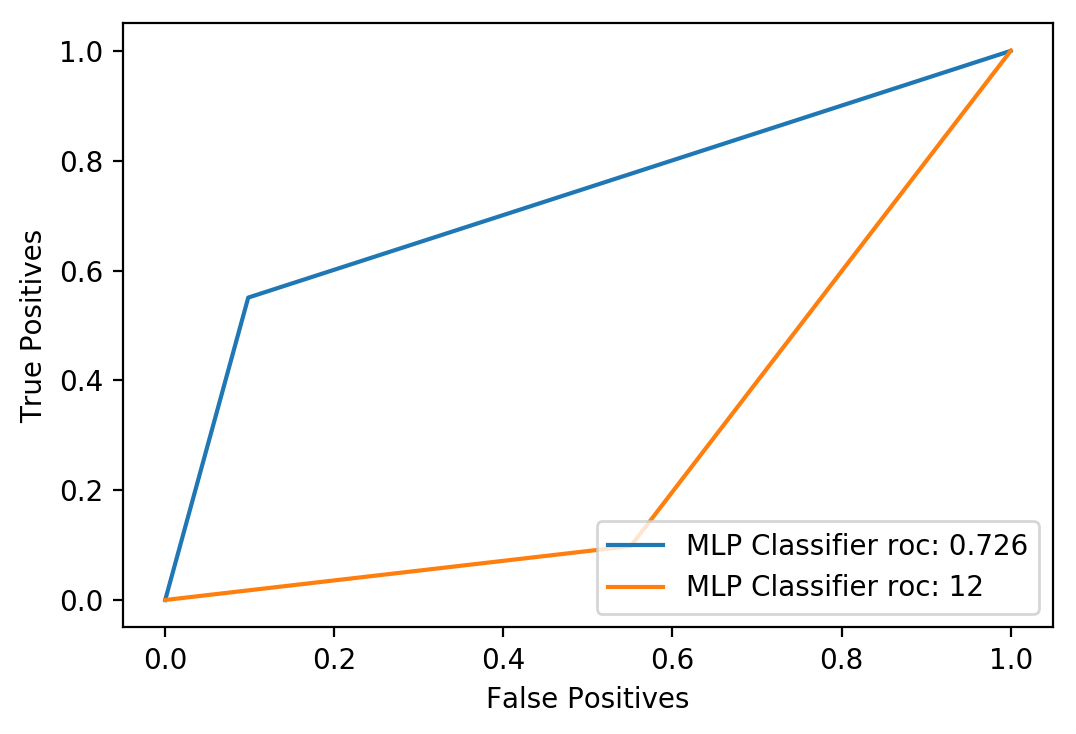

In [36]:
import matplotlib.pyplot as plt
plt.figure(dpi=200)
plt.plot(fpr, tpr, label=f'MLP Classifier roc: {auc_value:.3f}')
plt.plot(tpr, fpr, label=f'MLP Classifier roc: {12}')
plt.legend(loc='lower right')
plt.xlabel('False Positives')
plt.ylabel('True Positives')


In [37]:
grid_search = pd.DataFrame(grid_search_2layers.grid_scores_)
grid_search.sort_values(by='mean_validation_score', axis=0,ascending=False)[:5]['parameters']
#pd.concat([grid_search, pd.io.json.json_normalize(grid_search['parameters'])])
#grid_search

/Users/kexinzhai/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


23    {'activation': 'tanh', 'alpha': 0.0001, 'hidde...
18    {'activation': 'tanh', 'alpha': 0.0, 'hidden_l...
28    {'activation': 'tanh', 'alpha': 0.001, 'hidden...
15    {'activation': 'tanh', 'alpha': 0.0, 'hidden_l...
25    {'activation': 'tanh', 'alpha': 0.001, 'hidden...
Name: parameters, dtype: object

## 2. SVM Classifier

In [38]:
#baseline accuracy -- expect the classifier to outperform 
    # helpful - contextualizing how good the classifier is doing
# hot potfeatures
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

classifier = DummyClassifier(strategy='most_frequent')
classifier.fit(X_train2, Y_train2)

print("Training accuracy: %0.6f" % accuracy_score(Y_train2, classifier.predict(X_train2)))
print("Testing accuracy: %0.6f" % accuracy_score(Y_test2, classifier.predict(X_test2)))

Training accuracy: 0.732426
Testing accuracy: 0.738389


In [39]:
# running SVM without parameters
from sklearn.svm import SVC

train = []
test = []
classifier = SVC()
classifier.fit(X_train2, Y_train2)

train.append(accuracy_score(Y_train2, classifier.predict(X_train2)))
test.append(accuracy_score(Y_test2, classifier.predict(X_test2)))
        
print("Training accuracy: %0.6f" % accuracy_score(Y_train2, classifier.predict(X_train2)))
print("Test accuracy: %0.6f" % accuracy_score(Y_test2, classifier.predict(X_test2)))

Training accuracy: 0.801300
Test accuracy: 0.806635


### Testing Linear, RBF , & Poly with C = 1

In [40]:
# hot pot 
train = []
test = []

kernal_values = ['linear' , 'rbf' , "poly"]

for kernel in kernal_values:
    classifier = SVC(kernel= kernel, degree = 3 ,  C= 1  , random_state=123)
    classifier.fit(X_train2, Y_train2)
        
    train.append(accuracy_score(Y_train2, classifier.predict(X_train2)))
    test.append(accuracy_score(Y_test2, classifier.predict(X_test2)))
       
    train_accuracy = accuracy_score(Y_train2, classifier.predict(X_train2))
    test_accuracy = accuracy_score(Y_test2, classifier.predict(X_test2)) 
    
    print("|" , kernel , "|"  ,  train_accuracy  , "|" , test_accuracy )

| linear | 0.7986590816741163 | 0.7990521327014218
| rbf | 0.8013002844372207 | 0.8066350710900474
| poly | 0.7917513206013815 | 0.8014218009478673


In [41]:
train = []
test = []

kernal_values = ['linear' , 'rbf' , "poly"]
c_values =  [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

for kernel in kernal_values:
    for number in c_values:
        classifier = SVC(kernel= kernel, degree = 3, C = number, random_state=123)
        classifier.fit(X_train2, Y_train2)
        
        train.append(accuracy_score(Y_train2, classifier.predict(X_train2)))
        test.append(accuracy_score(Y_test2, classifier.predict(X_test2)))

        train_accuracy = accuracy_score(Y_train2, classifier.predict(X_train2))
        test_accuracy = accuracy_score(Y_test2, classifier.predict(X_test2)) 

        print("|" , kernel , "|", number , "|"  ,  train_accuracy  , "|" , test_accuracy )

| linear | 0.0001 | 0.7324258431531898 | 0.738388625592417
| linear | 0.001 | 0.746241365298659 | 0.7483412322274882
| linear | 0.01 | 0.7990654205607477 | 0.804739336492891
| linear | 0.1 | 0.7988622511174319 | 0.7995260663507109
| linear | 1.0 | 0.7986590816741163 | 0.7990521327014218
| linear | 10.0 | 0.798049573344169 | 0.8014218009478673
| linear | 100.0 | 0.7986590816741163 | 0.8009478672985783
| linear | 1000.0 | 0.7990654205607477 | 0.8004739336492891
| rbf | 0.0001 | 0.7324258431531898 | 0.738388625592417
| rbf | 0.001 | 0.7324258431531898 | 0.738388625592417
| rbf | 0.01 | 0.7324258431531898 | 0.738388625592417
| rbf | 0.1 | 0.7956115400243803 | 0.8061611374407583
| rbf | 1.0 | 0.8013002844372207 | 0.8066350710900474
| rbf | 10.0 | 0.812880942706217 | 0.8033175355450237
| rbf | 100.0 | 0.8352295814709467 | 0.8014218009478673
| rbf | 1000.0 | 0.8951645672490858 | 0.7601895734597156
| poly | 0.0001 | 0.7324258431531898 | 0.738388625592417
| poly | 0.001 | 0.7324258431531898 | 0

###  Testing Kernels with Gamma with top C value 

dff

- | linear | 1.0 | 0.8027224705404307 | 0.7966824644549763 |
- | rbf | 10.0 | 0.8193823648923202 | 0.7924170616113744 |
- | poly | 10.0 | 0.8171475010158472 | 0.7914691943127962|

In [42]:
# linear hot pot 
train = []
test = []

gamma_values = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
for gamma_v in gamma_values:
    classifier = SVC(kernel= "linear" , gamma = gamma_v  ,  C= .01  , random_state=123)
    classifier.fit(X_train2, Y_train2)
        
    train.append(accuracy_score(Y_train2, classifier.predict(X_train2)))
    test.append(accuracy_score(Y_test2, classifier.predict(X_test2)))

    train_accuracy = accuracy_score(Y_train2, classifier.predict(X_train2))
    test_accuracy = accuracy_score(Y_test2, classifier.predict(X_test2))  

    print( "|" ,  gamma_v , "|" ,   train_accuracy , "|" , test_accuracy , "|" )

| 0.01 | 0.7990654205607477 | 0.804739336492891 |
| 0.001 | 0.7990654205607477 | 0.804739336492891 |
| 0.0001 | 0.7990654205607477 | 0.804739336492891 |
| 1e-05 | 0.7990654205607477 | 0.804739336492891 |
| 1e-06 | 0.7990654205607477 | 0.804739336492891 |
| 1e-07 | 0.7990654205607477 | 0.804739336492891 |


In [43]:
# rbf hot pot 
# linear hot pot 
train = []
test = []

gamma_values = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
for gamma_v in gamma_values:
    classifier = SVC(kernel= "rbf" , gamma = gamma_v  ,  C= 10  , random_state=123)
    classifier.fit(X_train2, Y_train2)
        
    train.append(accuracy_score(Y_train2, classifier.predict(X_train2)))
    test.append(accuracy_score(Y_test2, classifier.predict(X_test2)))

    train_accuracy = accuracy_score(Y_train2, classifier.predict(X_train2))
    test_accuracy = accuracy_score(Y_test2, classifier.predict(X_test2))  

    print( "|" ,  gamma_v , "|" ,   train_accuracy , "|" , test_accuracy , "|" )

| 0.01 | 0.8065826899634295 | 0.8071090047393364 |
| 0.001 | 0.8010971149939049 | 0.8052132701421801 |
| 0.0001 | 0.7962210483543275 | 0.8023696682464455 |
| 1e-05 | 0.7324258431531898 | 0.738388625592417 |
| 1e-06 | 0.7324258431531898 | 0.738388625592417 |
| 1e-07 | 0.7324258431531898 | 0.738388625592417 |


In [44]:
# poly hot pot 
# linear hot pot 
train = []
test = []

gamma_values = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
for gamma_v in gamma_values:
    classifier = SVC(kernel= "poly" , gamma = gamma_v  , degree = 3  ,  C= 10  , random_state=123)
    classifier.fit(X_train2, Y_train2)
        
    train.append(accuracy_score(Y_train2, classifier.predict(X_train2)))
    test.append(accuracy_score(Y_test2, classifier.predict(X_test2)))

    train_accuracy = accuracy_score(Y_train2, classifier.predict(X_train2))
    test_accuracy = accuracy_score(Y_test2, classifier.predict(X_test2))  

    print( "|" ,  gamma_v , "|" ,   train_accuracy , "|" , test_accuracy , "|" )

| 0.01 | 0.7895164567249086 | 0.7971563981042654 |
| 0.001 | 0.7324258431531898 | 0.738388625592417 |
| 0.0001 | 0.7324258431531898 | 0.738388625592417 |
| 1e-05 | 0.7324258431531898 | 0.738388625592417 |
| 1e-06 | 0.7324258431531898 | 0.738388625592417 |
| 1e-07 | 0.7324258431531898 | 0.738388625592417 |


### top performing gamma with top C values 

dff
- Linear
- RBF
- Poly

### Feature Selection 
- Principle Component Analysis - PCA 

In [45]:
import numpy as np
from sklearn.decomposition import PCA

In [46]:
fs_dff = PCA(n_components=2)
fs_dff.fit(X_new)
fs_dff.explained_variance_ratio_

array([0.30427608, 0.19666202])

In [47]:
fs_dff.components_

array([[ 2.51329628e-03, -2.51329628e-03,  3.97837294e-02,
         6.42760180e-02, -8.40467626e-03,  3.10736288e-01,
         8.48057636e-03,  1.41556330e-01, -1.33075753e-01,
        -8.48057636e-03,  1.19532152e-02,  1.58053223e-01,
        -1.70006439e-01,  1.02854020e-01,  6.71524185e-02,
        -1.70006439e-01,  1.42406270e-01,  2.76001690e-02,
        -1.70006439e-01,  1.50558564e-01,  1.94478743e-02,
        -1.70006439e-01,  1.11727327e-01,  5.82791117e-02,
        -1.70006439e-01,  1.70022625e-01, -1.61862718e-05,
        -1.70006439e-01,  1.71054911e-01, -1.04847244e-03,
        -1.70006439e-01, -5.10922470e-02,  2.06428452e-02,
         3.04494017e-02,  8.67954865e-02,  4.06202778e-02,
        -9.81180929e-02,  2.97438513e-02,  2.77539639e-02,
         4.99684079e-01,  4.74318447e-01],
       [-1.22375545e-03,  1.22375545e-03, -4.11023412e-02,
         1.17571314e-01,  8.95598437e-02,  4.95594130e-01,
         1.70918038e-02,  3.53360862e-02, -1.82442824e-02,
        -1.70

In [48]:
fs_dff.mean_

array([ 4.95307167e-01,  5.04692833e-01,  1.62400455e-01,  4.82508532e-01,
        2.98492605e-01,  8.79084443e-17,  9.03299204e-01,  4.21928328e-01,
        4.81370876e-01,  9.67007964e-02,  3.43572241e-01,  4.40273038e-01,
        2.16154721e-01,  2.86547213e-01,  4.97298066e-01,  2.16154721e-01,
        3.44852105e-01,  4.38993174e-01,  2.16154721e-01,  3.43856655e-01,
        4.39988623e-01,  2.16154721e-01,  2.90102389e-01,  4.93742890e-01,
        2.16154721e-01,  3.84385666e-01,  3.99459613e-01,  2.16154721e-01,
        3.88367463e-01,  3.95477816e-01,  2.16154721e-01,  5.51052332e-01,
        2.09328783e-01,  2.39618885e-01,  5.92718999e-01,  3.36319681e-01,
        2.28100114e-01,  2.19283276e-01,  2.16296928e-01, -1.36712787e-15,
       -1.71800382e-15])

In [49]:
fs_dff.singular_values_

array([152.05034866, 122.24011797])

### looking at weights using perceptron 

In [50]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.feature_extraction.text import CountVectorizer

train = []
test = []

classifier = SGDClassifier(loss='perceptron', max_iter=1000, tol=1.0e-12, random_state=123)
classifier.fit(X_train2, Y_train2)

#classifier = Perceptron(alpha=0.0001 , tol=1e-3, random_state=0)

train.append(accuracy_score(Y_train2, classifier.predict(X_train2)))
test.append(accuracy_score(Y_test2, classifier.predict(X_test2)))

train_accuracy = accuracy_score(Y_train2, classifier.predict(X_train2))
test_accuracy = accuracy_score(Y_test2, classifier.predict(X_test2)) 

print("Number of SGD iterations: %d" % classifier.n_iter_)
print("Training accuracy: %0.6f" % accuracy_score(Y_train2, classifier.predict(X_train2)))
print("Test accuracy: %0.6f" % accuracy_score(Y_test2, classifier.predict(X_test2)))

print("\nFeature weights:")
args = np.argsort(classifier.coef_[0])
for a in args:
    print(" %s: %0.4f" % ('weights' , classifier.coef_[0][a]))

Number of SGD iterations: 45
Training accuracy: 0.778952
Test accuracy: 0.790521

Feature weights:
 weights: -0.4668
 weights: -0.1798
 weights: -0.1640
 weights: -0.0915
 weights: -0.0899
 weights: -0.0449
 weights: -0.0000
 weights: 0.2697
 weights: 0.3146
 weights: 0.3146
 weights: 0.3596
 weights: 0.4045
 weights: 0.4045
 weights: 0.4495
 weights: 0.4495
 weights: 0.4495
 weights: 0.4495
 weights: 0.4495
 weights: 0.4495
 weights: 0.4495
 weights: 0.4495
 weights: 0.4944
 weights: 0.5394
 weights: 0.5394
 weights: 0.5843
 weights: 0.5843
 weights: 0.5843
 weights: 0.5843
 weights: 0.6292
 weights: 0.6292
 weights: 0.6742
 weights: 0.6742
 weights: 0.6742
 weights: 0.6742
 weights: 0.7191
 weights: 0.7641
 weights: 0.7641
 weights: 0.8540
 weights: 0.8540
 weights: 0.9439
 weights: 1.0338


## 3. Decision Trees Classifier

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

#Without using parameter
classifier = DecisionTreeClassifier()
classifier.fit(X_train2, Y_train2)

print("Training accuracy: %0.6f" % accuracy_score(Y_train2, classifier.predict(X_train2)))
print("Test accuracy: %0.6f" % accuracy_score(Y_test2, classifier.predict(X_test2)))

Training accuracy: 0.998375
Test accuracy: 0.725118


In [52]:
max_d = [3,8,14,100]
min_s = [1,5,10,15,50]
for d in max_d:
    for s in min_s:
        classifier = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s, random_state=123)
        classifier.fit(X_train2, Y_train2)

        print ("max_depth is " + str(d) + " and min_sample_leaf is " + str(s))
        print("Training accuracy: %0.6f" % accuracy_score(Y_train2, classifier.predict(X_train2)))
        print("Test accuracy: %0.6f" % accuracy_score(Y_test2, classifier.predict(X_test2)))

max_depth is 3 and min_sample_leaf is 1
Training accuracy: 0.784844
Test accuracy: 0.797156
max_depth is 3 and min_sample_leaf is 5
Training accuracy: 0.784844
Test accuracy: 0.797156
max_depth is 3 and min_sample_leaf is 10
Training accuracy: 0.784844
Test accuracy: 0.797156
max_depth is 3 and min_sample_leaf is 15
Training accuracy: 0.784844
Test accuracy: 0.797156
max_depth is 3 and min_sample_leaf is 50
Training accuracy: 0.784844
Test accuracy: 0.797156
max_depth is 8 and min_sample_leaf is 1
Training accuracy: 0.839293
Test accuracy: 0.778199
max_depth is 8 and min_sample_leaf is 5
Training accuracy: 0.830557
Test accuracy: 0.784360
max_depth is 8 and min_sample_leaf is 10
Training accuracy: 0.824868
Test accuracy: 0.794787
max_depth is 8 and min_sample_leaf is 15
Training accuracy: 0.821211
Test accuracy: 0.786256
max_depth is 8 and min_sample_leaf is 50
Training accuracy: 0.806583
Test accuracy: 0.797630
max_depth is 14 and min_sample_leaf is 1
Training accuracy: 0.958147
Test 

In [53]:
#from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import classification_report,confusion_matrix
predictions = classifier.predict(X_test2)
print(classification_report(Y_test2,predictions))
#Examine and describe the individual instances the classifier misclassifies

             precision    recall  f1-score   support

          0       0.83      0.91      0.87      1558
          1       0.66      0.47      0.55       552

avg / total       0.78      0.80      0.79      2110



In [54]:
from sklearn.metrics import confusion_matrix

classifier = DecisionTreeClassifier(max_depth=14, min_samples_leaf=1, random_state=123)
classifier.fit(X_train2, Y_train2)

con_matrix = confusion_matrix(Y_test2, classifier.predict(X_test2))
print(con_matrix)

[[1256  302]
 [ 262  290]]


In [55]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score

classifier = SGDClassifier(loss='perceptron', max_iter=1000, tol=1.0e-12, random_state=123, average=True)
classifier.fit(X_train2, Y_train2)

print("\nFeature weights:")
args = np.argsort(classifier.coef_[0])
for a in args:
    print(" %s: %0.4f" % (feature_name2[a], classifier.coef_[0][a]))


Feature weights:
 tenure: -0.7772
 MonthlyCharges: -0.6651
 Contract(two year): -0.5998
 InternetService(DSL): -0.3585
 TotalCharges: -0.3371
 Partner: -0.2314
 Dependents: -0.0398
 MultipleLines(no): 0.0228
 PaymentMethod(CreditCard): 0.1901
 PaymentMethod(MailedCheck): 0.1990
 SeniorCitizen: 0.2437
 TechSupport(none): 0.2504
 StreamingMovies(none): 0.2504
 DeviceProtection(none): 0.2504
 OnlineBackup(none): 0.2504
 StreamingTV(none): 0.2504
 InternetService(No): 0.2504
 OnlineSecurity(none): 0.2504
 StreamingTV(no): 0.2680
 OnlineSecurity(yes): 0.2995
 StreamingMovies(no): 0.3050
 PaymentMethod(BankTransfer): 0.3500
 PaperlessBilling: 0.4307
 TechSupport(yes): 0.4552
 MultipleLines(yes): 0.5447
 OnlineBackup(yes): 0.5543
 Contract(one year): 0.5610
 PhoneService: 0.5674
 DeviceProtection(no): 0.6033
 DeviceProtection(yes): 0.6366
 Female: 0.6502
 OnlineBackup(no) : 0.6857
 PaymentMethod(ElectronicCheck): 0.7513
 TechSupport(no): 0.7848
 Male: 0.8402
 MultipleLines(none): 0.9230
 Str

In [60]:
linear_kernel_class = SVC(kernel= "linear" , degree = 3  ,  C= 1  , random_state=123)
linear_kernel_class.fit(X_train2, Y_train2)
linear_kernel_class.predict(X_test2)
# max_depth is 100 and min_sample_leaf is 50
# Training accuracy: 0.806583
# Test accuracy: 0.797630

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
dt_best_class = classifier = DecisionTreeClassifier(max_depth=100, min_samples_leaf=50, random_state=123)
dt_best_class.fit(X_test2, Y_test2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [64]:
dt_pred = dt_best_class.predict(X_test2)
mlp_pred = grid_search_2layers.predict(X_test2)
lin_pred = linear_kernel_class.predict(X_test2)



Text(0, 0.5, 'True Positives')

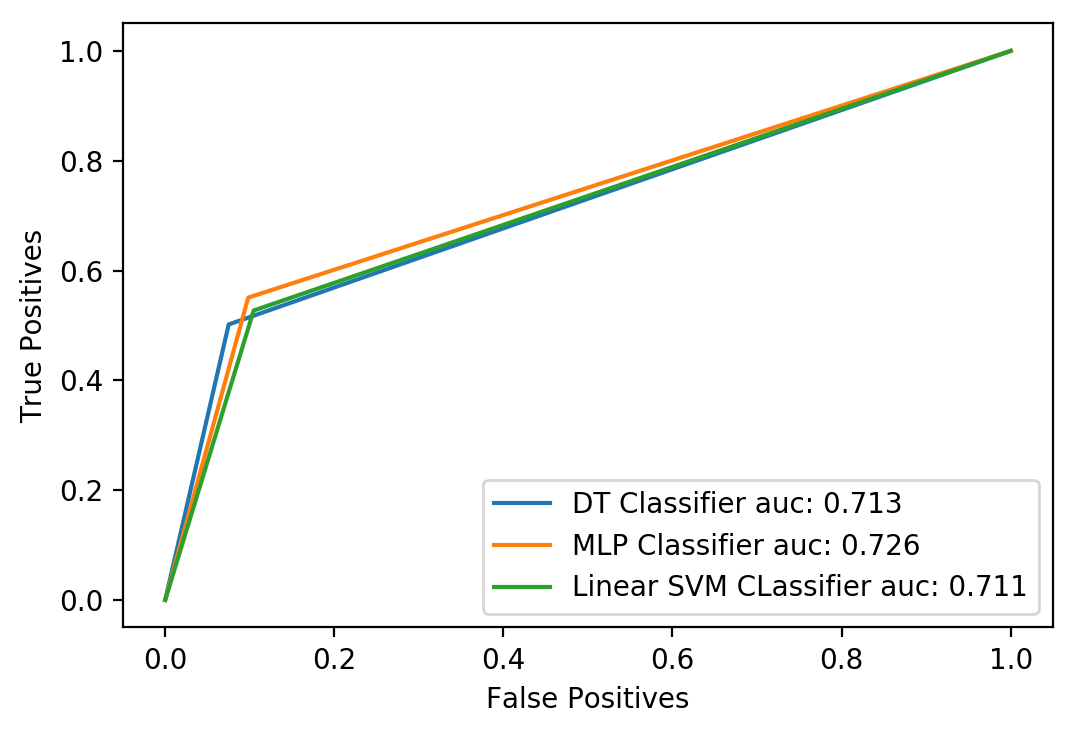

In [69]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(Y_test2, dt_pred)
auc_val = auc(fpr, tpr)
plt.figure(dpi = 200)
plt.plot(fpr, tpr, label = f'DT Classifier auc: {auc_val:.3f}')

fpr, tpr, _ = roc_curve(Y_test2, mlp_pred)
auc_val = auc(fpr, tpr)
plt.plot(fpr, tpr, label = f'MLP Classifier auc: {auc_val:.3f}')

fpr, tpr, _ = roc_curve(Y_test2, lin_pred)
auc_val = auc(fpr, tpr)
plt.plot(fpr, tpr, label = f'Linear SVM CLassifier auc: {auc_val:.3f}')

plt.legend(loc='lower right')
plt.xlabel('False Positives')
plt.ylabel('True Positives')